#### 1.11.2 随机树森林
▲在sklearn.ensemble模块中包含了两种基于决策树的平均集成算法：随机森林（the RandomForest）和极端随机树（Extra-Trees）。这两种算法专门为树模型设计，这意味着在构造基学习模型时，引入随机性。这个预测结果通过各个基模型的结果的平均。

▲与其他分类器相同，该分类器的拟合必须提供两个数组：大小为[n_samples，n_features]的X数组，包含训练样本；大小为[n_samples]的Y数组，包含训练样本的标签。可扩展为多分类问题。

In [1]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)  # 决策树的个数
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [2]:
clf.feature_importances_

array([0.3, 0.4])

##### 1.11.2.1 随机森林（RandomForests)
▲每个决策树都是通过反复抽取数据集中的数据生成的训练集所拟合.此外，在生产决策树的过程中，节点的选择不再是属性中的最佳属性；节点为子集的最佳拆分节点。由于该随机性，森林的偏差通常略有增加；由于平均的原因，其方差会减少；会补偿偏差，因此该模型的整体收益较好。与原始版本相反，sklearn通过平均概率的方式集成，而不是通过投票的方式。

##### 1.11.2.2 极端随机数(ExtremelyRandomizedTrees)
▲在极端随机树中，在拆分节点的过程中随机性会更进一步的进行考虑。在极端随机树中，训练集为属性的随机组合，在节点分割时，并不是寻找最佳分割阈值，而是随机的抽取。通常该模型会更进一步的减少方差，但是其偏差会相对于增加。

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
X, y = make_blobs(n_samples=10000, n_features=10, centers=100, random_state=0)

In [5]:
X.shape, y.shape

((10000, 10), (10000,))

In [6]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)

In [7]:
scores = cross_val_score(clf, X, y)
scores.mean()

0.9794087938205586

In [8]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [9]:
scores = cross_val_score(clf, X, y)
scores.mean()

0.9996078431372549

In [10]:
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)

In [11]:
scores = cross_val_score(clf, X, y)
scores.mean()

0.99989898989899

##### 1.11.2.5 特征重要性估计（Feature Importance Valuation)
▲在决策树中，属性节点的深度可以用来评价该属性的相对重要程度。在大比例样本输入时，决策树顶的属性有助于做出预测结果。样本得到的结果可以用来反映这些特征的重要性。下面的例子是一个颜色编码，其中展示了利用ExtraTreesClassifier模型的人脸识别中，每个像素的重要性。

In [12]:
%matplotlib inline
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

In [13]:
n_jobs = 1  # 多线程工作

In [14]:
# 加载数据
data = fetch_olivetti_faces()  
X = data.images.reshape((len(data.images), -1))  # 400幅64*64
y = data.target

In [15]:
mask = y < 5
X = X[mask]
y = y[mask]
print(X.shape, '\n', y.shape)

(50, 4096) 
 (50,)


In [16]:
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000,
                              max_features=128,
                              n_jobs=n_jobs,
                              random_state=0)
forest.fit(X, y)
print("Done in %0.3f"%(time() - t0))

Done in 2.796


In [17]:
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

Text(0.5, 1.05, 'Pixel improtences with forests of trees')

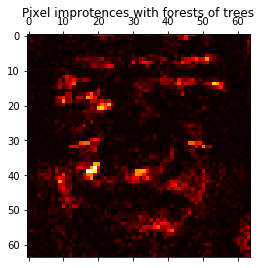

In [18]:
plt.matshow(importances, cmap=plt.cm.hot)
plt.title('Pixel improtences with forests of trees')

##### 1.11.2.6 嵌入式完全随机树（TotallyRandom Trees Embedding)
▲RandomTreesEmbedding实现了数据的无监督学习。其编码方式以1到k的方式，从高维数据到稀疏二进制编码。这种编码方式很有效，可以用作其他学习任务的基础。通过选择树的个数和深度可以决定该编码的大小和稀疏程度。在集成中的每个树，其编码包括了每个完整的树。编码的最大大小为n_estimators*2**max_depth，森林中树叶的最大值。邻近的数据点很可能具有相同的树叶节点，其间的转换时隐式、非参数的密度估计。下面的例子是使用完全随机树进行hash转换：http://scikit-learn.org/stable/auto_examples/ensemble/plot_random_forest_embedding.html#sphx-glr-auto-examples-ensemble-plot-random-forest-embedding-py

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

In [20]:
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)
print(X.shape, y.shape)

(100, 2) (100,)


In [21]:
# 利用RandomTreesEmbedding转换数据
hasher = RandomTreesEmbedding(n_estimators=10,
                              random_state=0,
                              max_depth=3)
X_transformed = hasher.fit_transform(X)

In [22]:
# 使用截断奇异值分解降低数据维数
svd = TruncatedSVD(n_components=2)
X_reduces = svd.fit_transform(X_transformed)

In [23]:
print(X_transformed.shape, X_reduces.shape)  # 74d --> 2d

(100, 74) (100, 2)


In [24]:
# 拟合贝叶斯分类器
nb = BernoulliNB()
nb.fit(X_transformed, y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [25]:
# 极端随机树进行学习
trees = ExtraTreesClassifier(max_depth=3,
                             n_estimators=10,
                             random_state=0)
trees.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=3, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

([], <a list of 0 Text yticklabel objects>)

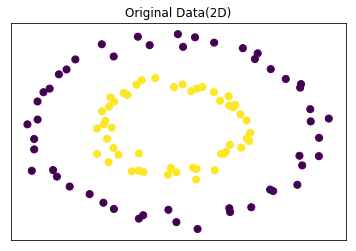

In [26]:
# 绘制原始图和减维后的散点图
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.title("Original Data(2D)")
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

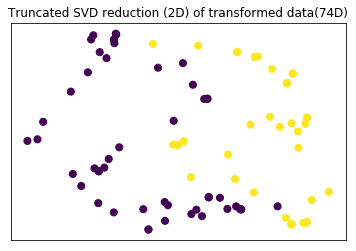

In [27]:
plt.scatter(X_reduces[:, 0], X_reduces[:, 1], c=y, s=50)
plt.title("Truncated SVD reduction (2D) of transformed data(%dD)"%(X_transformed.shape[1]))
plt.xticks(())
plt.yticks(())

In [28]:
# 为画彩色图做准备
h = 0.01
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

NameError: name 'r' is not defined

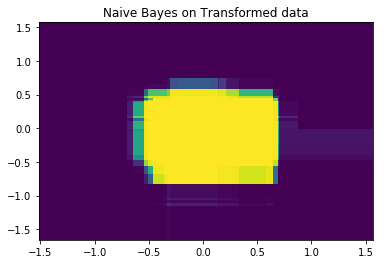

In [29]:
plt.title("Naive Bayes on Transformed data")
plt.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
plt.scatter(X[:, 0], X[:, 1], c=r, s=50)
plt.ylim(-1.4, 1.4)
plt.xlim(-1.4, 1.4)
plt.xticks(())
plt.yticks(())
plt.tight_layout()

In [ ]:
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

In [ ]:
plt.title("ExtraTrees Predictions")
plt.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plt.ylim(-1.4, 1.4)
plt.xlim(-1.4, 1.4)
plt.xticks(())
plt.yticks(())
plt.tight_layout()